In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [71]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [72]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.241884,0.995988,-1.666862,1.744148,-1.352079,1
1,-2.395118,1.536442,-0.751927,1.223148,2.231754,0
2,0.401875,-2.547733,-3.316018,0.131703,1.758484,0
3,0.257044,2.283216,0.182180,1.143317,-0.285962,0
4,-1.840957,1.842958,-0.275434,1.478365,0.937247,0


In [73]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)


In [74]:
#function for feature sampling 

def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1] , int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df 

In [75]:
# function for combined sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [77]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

C:\Users\laksh\AppData\Local\Temp\ipykernel_24192\17588270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\laksh\AppData\Local\Temp\ipykernel_24192\17588270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\laksh\AppData\Local\Temp\ipykernel_24192\17588270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [78]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col3', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')


In [79]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [80]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [81]:
from sklearn.tree import plot_tree

[Text(0.45454545454545453, 0.9375, 'x[0] <= -0.047\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.36363636363636365, 0.8125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.40909090909090906, 0.875, 'True  '),
 Text(0.5454545454545454, 0.8125, 'x[1] <= -1.177\ngini = 0.492\nsamples = 39\nvalue = [17, 22]'),
 Text(0.5, 0.875, '  False'),
 Text(0.36363636363636365, 0.6875, 'x[0] <= 1.104\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.2727272727272727, 0.5625, 'x[0] <= 1.006\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.18181818181818182, 0.4375, 'x[1] <= -1.922\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.09090909090909091, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.36363636363636365, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.45454545454545453, 0.5625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7272727272727273, 0.6875, '

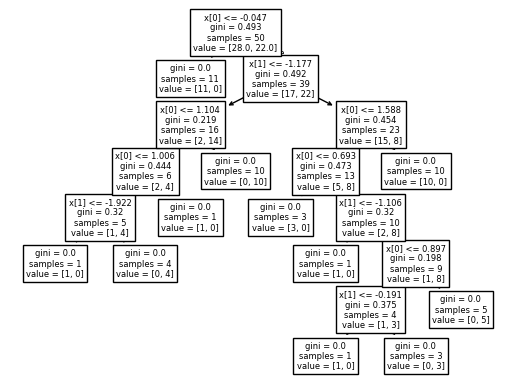

In [82]:
plot_tree(clf1)

[Text(0.5, 0.9444444444444444, 'x[1] <= -0.128\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2, 0.8333333333333334, 'x[1] <= -0.546\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.35, 0.8888888888888888, 'True  '),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.3, 0.7222222222222222, 'x[1] <= -0.496\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.8333333333333334, 'x[1] <= 0.801\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.65, 0.8888888888888888, '  False'),
 Text(0.7, 0.7222222222222222, 'x[1] <= 0.781\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0.6, 0.6111111111111112, 'x[1] <= 0.529\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.5, 0.5, 'x[1] <= 0.494\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.4, 0.3888888888888889, 'x[1] <= -0

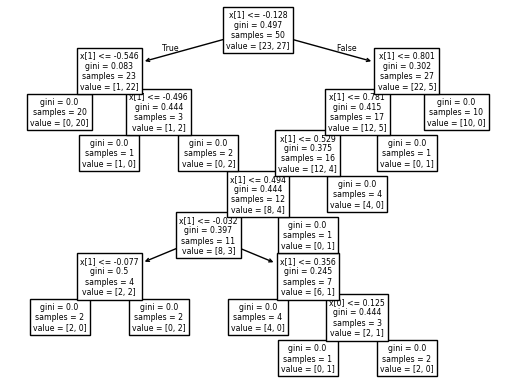

In [83]:
plot_tree(clf2)

[Text(0.5, 0.9285714285714286, 'x[0] <= 1.62\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[0] <= 0.718\ngini = 0.381\nsamples = 43\nvalue = [32, 11]'),
 Text(0.4545454545454546, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'x[1] <= -0.222\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[1] <= -0.734\ngini = 0.219\nsamples = 32\nvalue = [28, 4]'),
 Text(0.45454545454545453, 0.5, 'x[1] <= -3.006\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8181818181818182, 0.5, 'x[1] <= 2.041\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'

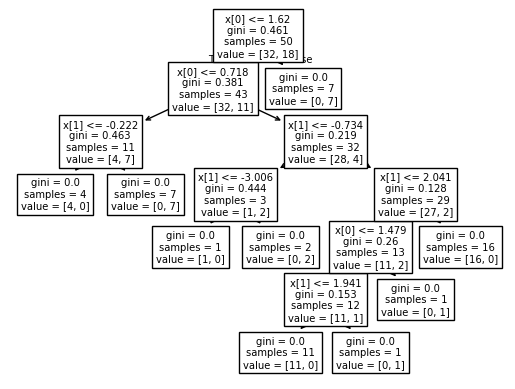

In [84]:
plot_tree(clf3)

In [85]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])